In [198]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [199]:
model = torch.load('../data storage/prm_data_L16_FCNN_Nh3.pth')
model

OrderedDict([('fc1.weight',
              tensor([[ 2.9878e-01,  7.7062e-02,  9.6277e-02, -3.0752e-03, -2.9228e-01,
                       -3.4411e-01, -2.4185e-01, -3.2621e-01, -1.5459e-01,  7.7350e-03,
                        2.0541e-01,  1.4677e-01,  1.8753e-01,  4.2867e-02, -2.6156e-02,
                        2.6361e-02,  1.5173e-01, -1.1629e-01, -1.0136e-01, -1.5823e-01,
                       -2.2609e-01, -3.7781e-01, -5.1706e-01, -2.9983e-01, -1.8799e-01,
                       -1.3444e-01, -1.2193e-01, -5.8659e-02,  1.4769e-01,  3.8910e-02,
                        1.8161e-01,  4.6578e-02, -1.0300e-01, -2.8612e-01, -2.5370e-01,
                       -3.9215e-01, -3.7270e-01, -5.3033e-01, -3.6435e-01, -3.0225e-01,
                       -3.4605e-01, -2.5179e-01, -2.8018e-01,  1.2228e-01,  1.7005e-01,
                       -4.8689e-02, -1.8744e-02,  5.5109e-02, -1.7307e-01, -2.0442e-01,
                       -7.1366e-02, -1.0487e-01, -3.9196e-01, -5.6692e-01, -5.0707e-01,
    

In [200]:
fc2_weight = model['fc2.weight']
fc2_weight

tensor([[ 0.2075, -1.9969,  0.2172],
        [ 0.8402, -1.7095,  0.4371],
        [ 0.6449, -1.8316,  0.9823],
        [ 0.3155, -2.1872,  0.8906],
        [ 0.5909, -2.2400,  0.7932],
        [ 0.0126, -2.9495, -0.1416],
        [ 0.7416, -2.9344,  0.1018],
        [-0.6289, -2.4051,  0.4685],
        [-2.0886, -0.3913, -3.0619],
        [-3.5231,  0.5618, -3.9604],
        [-5.2508,  0.1143, -5.0242],
        [-5.3244,  0.7173, -5.7400],
        [-6.1502,  0.3385, -6.3742],
        [-6.1038,  0.3355, -6.7350],
        [-6.1404,  0.8715, -5.8285],
        [-6.4153,  0.6157, -6.6087],
        [-6.9388,  0.2097, -6.5922],
        [-6.6673,  0.7550, -6.5738],
        [-6.5228,  0.9701, -6.1205],
        [-6.5040,  0.0810, -6.4606]])

In [201]:
fc2_weight.size()

torch.Size([20, 3])

In [202]:
# NumPy配列に変換
fc2_weight_np = fc2_weight.cpu().numpy()
# データを転置して
fc2_weight_np_square = fc2_weight_np.T

In [203]:
fc2_weight_np_square

array([[ 0.20749821,  0.8402115 ,  0.6448904 ,  0.31553674,  0.59090817,
         0.01262277,  0.74164796, -0.628875  , -2.0885997 , -3.5230782 ,
        -5.250838  , -5.3244343 , -6.150204  , -6.103812  , -6.140427  ,
        -6.415342  , -6.938826  , -6.667346  , -6.5227733 , -6.5039983 ],
       [-1.9969283 , -1.7094921 , -1.8316325 , -2.1872475 , -2.240016  ,
        -2.9495127 , -2.9343991 , -2.4050941 , -0.39127758,  0.5617818 ,
         0.11430134,  0.7173139 ,  0.33847943,  0.33554122,  0.87149876,
         0.61572844,  0.20966926,  0.7550141 ,  0.97009766,  0.08104827],
       [ 0.21722035,  0.4370691 ,  0.9823395 ,  0.89063025,  0.793223  ,
        -0.14158705,  0.10176518,  0.46846125, -3.0619156 , -3.9603622 ,
        -5.0242043 , -5.739971  , -6.374205  , -6.7350216 , -5.828455  ,
        -6.6086707 , -6.592181  , -6.573802  , -6.120456  , -6.460593  ]],
      dtype=float32)

In [204]:
fc2_weight_np_square.shape

(3, 20)

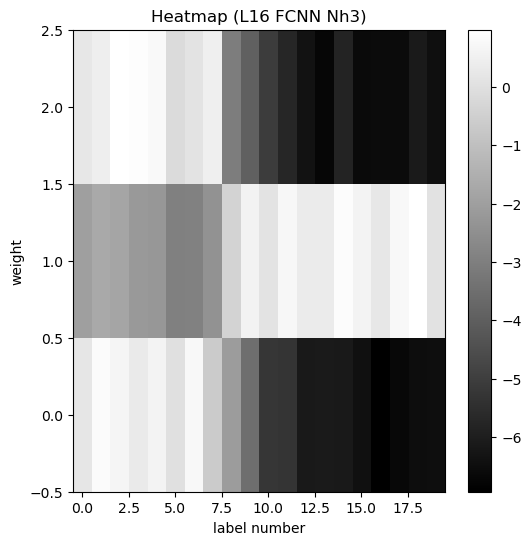

In [205]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc2_weight_np_square, cmap='gray', interpolation='nearest', origin='lower', aspect='auto')
plt.colorbar()
plt.title('Heatmap (L16 FCNN Nh3)')


# x軸とy軸に名前を付ける
plt.ylabel('weight')
plt.xlabel('label number')
# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_wight.png')
plt.show()

In [206]:
fc2_weight_np_square_sum = np.sum(fc2_weight_np_square, axis=0)
fc2_weight_np_square_sum

array([ -1.5722098 ,  -0.4322115 ,  -0.20440257,  -0.98108053,
        -0.8558848 ,  -3.078477  ,  -2.090986  ,  -2.565508  ,
        -5.541793  ,  -6.9216585 , -10.160741  , -10.347092  ,
       -12.18593   , -12.503292  , -11.0973835 , -12.408284  ,
       -13.321339  , -12.486134  , -11.673132  , -12.883543  ],
      dtype=float32)

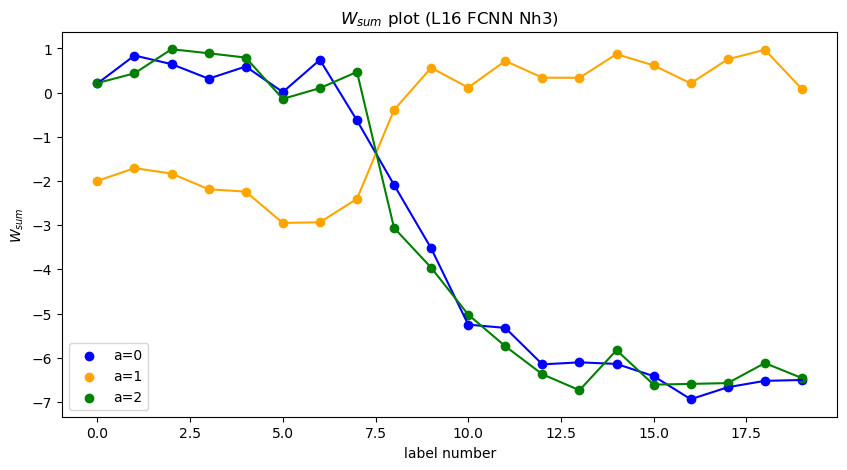

In [207]:
import numpy as np
import matplotlib.pyplot as plt

# データ
x = np.arange(len(fc2_weight_np_square[1]))
y0 = fc2_weight_np_square[0]
y1 = fc2_weight_np_square[1]
y2 = fc2_weight_np_square[2]

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')
plt.plot(x, y0, color='blue')
plt.plot(x, y1, color='orange')
plt.plot(x, y2, color='green')
plt.title('$W_{sum}$ plot (L16 FCNN Nh3)')
plt.xlabel('label number')
plt.ylabel('$W_{sum}$')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_weight_plot.png')
plt.legend()  # 凡例を表示
plt.show()

第1層の出力と磁化の相関図を作成

In [208]:
# 磁化を計算
def magnetization(state):
   return np.mean(state)

In [209]:
import io
import pickle
      
class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

In [210]:
# ファイルの相対パスを指定
file_path = '../data storage/Ising_data_L16.pkl'

if torch.cuda.is_available():
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
else:
    with open(file_path, 'rb') as file:
        loaded_data = CPU_Unpickler(file).load()
        
# 読み込んだデータを個々の変数に分割
spin_data, label_data = loaded_data

In [211]:
spin_data

[array([[-1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.,
         -1.,  1., -1.],
        [ 1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,
         -1.,  1.,  1.],
        [ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
          1.,  1., -1.],
        [-1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
         -1.,  1., -1.],
        [-1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
         -1.,  1., -1.],
        [ 1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
         -1., -1., -1.],
        [ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
         -1., -1.,  1.],
        [ 1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
          1.,  1.,  1.],
        [-1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
         -1.,  1., -1.],
        [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
          1.,  1.,  1.],
        [-

In [212]:
spin_data[0].shape

(16, 16)

In [213]:
num_spin_data = len(spin_data)
flat_spin_data = [spin_data[i].flatten() for i in range(num_spin_data)]
flat_spin_data[0].shape

(256,)

In [214]:
magnetization(flat_spin_data[1])

-0.03125

In [215]:
fc1_weight = model['fc1.weight'].numpy()
len(fc1_weight)

3

In [216]:
# 内積
output_data_0 = []
output_data_1 = []
output_data_2 = []
mag_data = []

for i in range(num_spin_data):
    dot_product_0 = np.dot(flat_spin_data[i], fc1_weight[0])
    output_data_0.append(dot_product_0)
    dot_product_1 = np.dot(flat_spin_data[i], fc1_weight[1])
    output_data_1.append(dot_product_1)
    dot_product_2 = np.dot(flat_spin_data[i], fc1_weight[2])
    output_data_2.append(dot_product_2)
    mag = magnetization(flat_spin_data[i])
    mag_data.append(mag)

In [217]:
len(output_data_0)

40000

In [218]:
len(mag_data)

40000

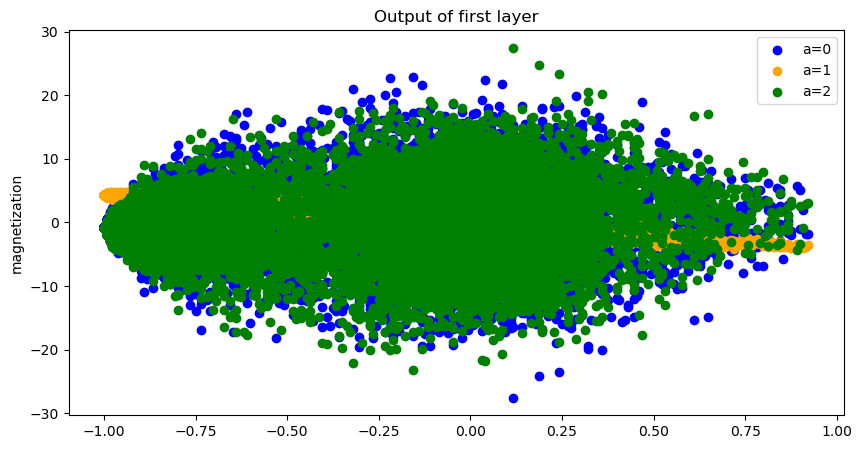

In [223]:
# データ
x = mag_data
y0 = output_data_0
y1 = output_data_1
y2 = output_data_2

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y0, color='blue', label='a=0')
plt.scatter(x, y1, color='orange', label='a=1')
plt.scatter(x, y2, color='green', label='a=2')


plt.title('Output of first layer')
plt.ylabel('magnetization')

# 図をファイルとして保存
plt.savefig('../image/L16_FCNN_Nh3_output.png')
plt.legend()  # 凡例を表示
plt.show()